###Data analysis, processing & cleaning

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
import scipy.stats

#Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount to G-drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Risk/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
#We have 4 categorical and 8 numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
#Checking for null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
#Null values (%)
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [7]:
#Removing missing values
df2 = df.dropna(axis=0)

In [8]:
#Checking for null values
df2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
#Rows reduced after cleaning from 32,581 to 28,638
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
#Statistical analysis of the dataset
df2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


We can see that the max age of 144 looks incorrect as well as 123 years employment age so some further cleaning will be necessary.

In [11]:
#Scatterplot matrix
fig = px.scatter_matrix(df2, dimensions=
["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income"],
labels={col:col.replace('_', ' ') for col in df2.columns}, 
height=900, color="loan_status", 
color_continuous_scale=px.colors.diverging.Tealrose)
fig.update_layout(title_text="Scatter relationships amongst numerical columns and loan status")
fig.show()


Visual analysis of Outliers :

Age: 123, 144 years old

Income: 6M (with 144 years age)
Employment Length: 123 years

Loan Amount: looks reasonable upto 35k

Interest Rate: Between 5-23% approx

Loan to Income Ratio: As high as 0.83


In [12]:
#Removing outliers
df2 = df2[df2["person_age"]<=100]
df2 = df2[df2["person_emp_length"]<=85]
df2 = df2[df2["person_income"]<= 2500000]

In [13]:
#Scatterplot matrix (visual check for outliers)
fig = px.scatter_matrix(df2, dimensions=
["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income"],
labels={col:col.replace('_', ' ') for col in df2.columns}, 
height=900, color="loan_status", 
color_continuous_scale=px.colors.diverging.Tealrose)
fig.update_layout(title_text="Scatter relationships amongst numerical columns and loan status")
fig.show()

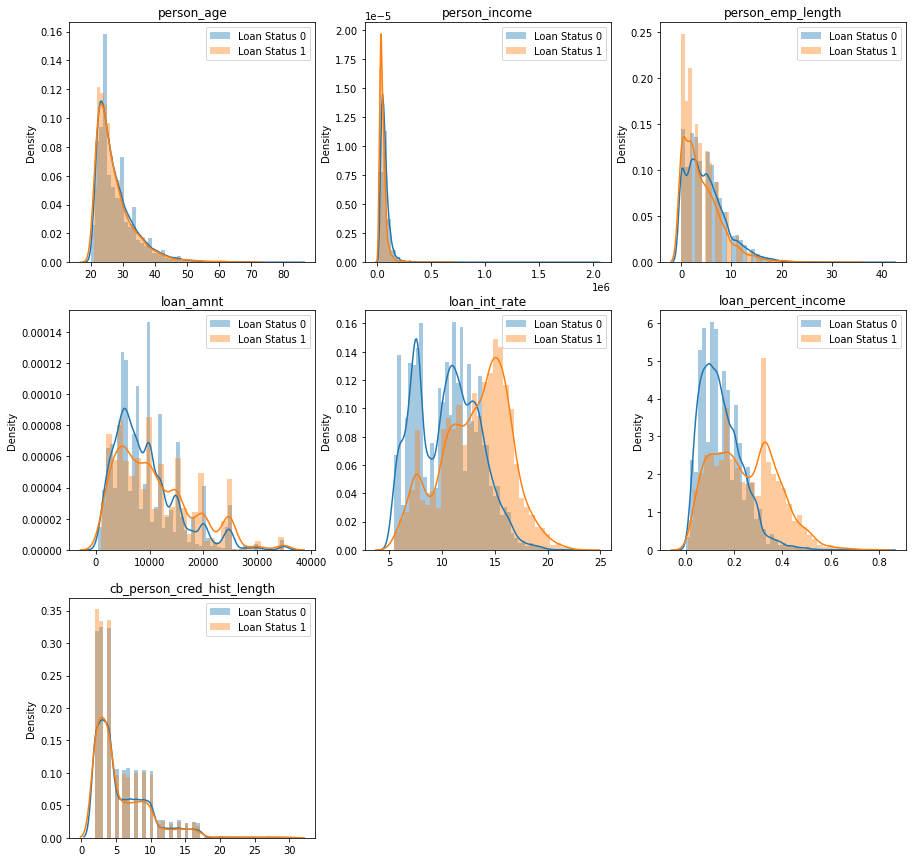

In [14]:
num_col = [numname for numname in df2.columns if df2[numname].dtype in ['int64', 'float64']]
num_col.remove("loan_status") # [0,1] target variable dropped

df2_0 = df2[df2['loan_status'] == 0]
df2_1 = df2[df2['loan_status'] == 1]

plt.figure(figsize = (15, 15))
for i in enumerate(num_col):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df2_0, x = df2_0[i[1]], label='Loan Status 0')
    sns.distplot(df2_1, x = df2_1[i[1]], label='Loan Status 1')
    plt.title(i[1])
    plt.legend()

In [15]:
df2.skew()

person_age                    1.920265
person_income                 9.049089
person_emp_length             1.254614
loan_amnt                     1.173796
loan_int_rate                 0.204112
loan_status                   1.375965
loan_percent_income           1.077015
cb_person_cred_hist_length    1.661837
dtype: float64

In [16]:
df2.kurtosis()

person_age                      5.573873
person_income                 202.667726
person_emp_length               2.466914
loan_amnt                       1.347417
loan_int_rate                  -0.661259
loan_status                    -0.106729
loan_percent_income             1.288449
cb_person_cred_hist_length      3.723082
dtype: float64

person_age: Most people are 20 to 60 years old.

person_emp_length: The majority of people have upto 20 years of employment. Default is higher initially amongst people with less employment years but falls below the no default group as the number of years experience increases.

Majority of the loans amounts are in the 0 -20k range with the majority interest rates between 5-15%. People with higher loan amounts default more.

Most of the loan to income values for the loan takers is between 0 and 0.6.

Higher loan to income ratio and interest rates leads to higher default.

The distributions are positively skewed to the right.

In [17]:
df2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


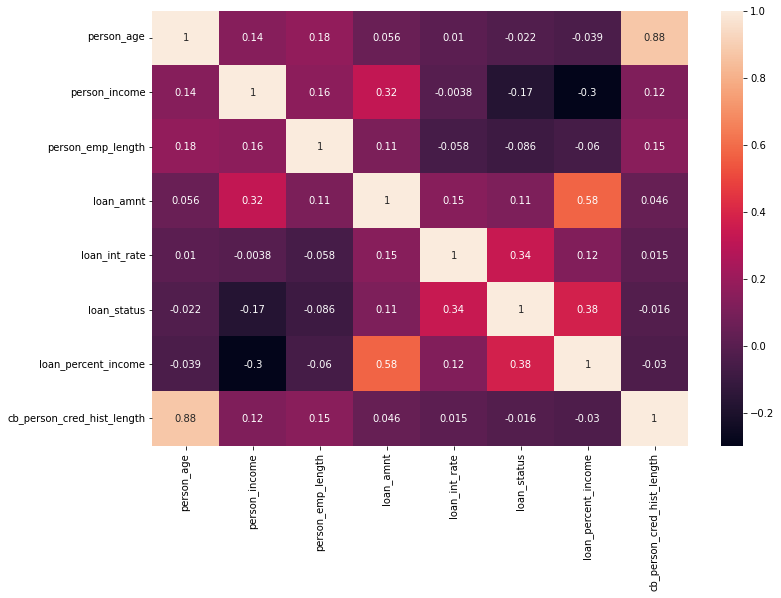

In [18]:
#Correlation matrix of numerical columns
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(df2.corr(), annot=True)
df2.corr().round(2);

Correlation Matrix: 

Negative correlations of variables against the loan status shows that as the variable values increase, the person moves towards 0 or no default. These are represented here by 'person age, income, employment length and credit history length'.

Positive correlations of variables against the loan status shows that as the variable values increase, the individual moves towards 1 or default. These are represented here by 'loan amount, interest rate and loan to income ratio'.


In [19]:
#Unique classes in categorical columns
df2.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [20]:
# Correlations with loan status + sort
correlations = df2.corr()['loan_status'].sort_values()
print('Correlations:\n', correlations)

Correlations:
 person_income                -0.167028
person_emp_length            -0.086486
person_age                   -0.022498
cb_person_cred_hist_length   -0.015575
loan_amnt                     0.113363
loan_int_rate                 0.339307
loan_percent_income           0.379534
loan_status                   1.000000
Name: loan_status, dtype: float64


###Analysis of data columns


In [21]:
df2['person_age'].describe()

count    28632.000000
mean        27.712140
std          6.171989
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64

In [22]:
#Creating Age dataframe
age_data = df2[['loan_status', 'person_age']]
age_data['person_age'] = age_data['person_age']

#Binning Age data
age_data['yearly_buckets'] = pd.cut(age_data['person_age'], bins = np.linspace(20, 70, num = 11))
age_data.head(5)

,loan_status,person_age,yearly_buckets
1,0,21,"(20.0, 25.0]"
2,1,25,"(20.0, 25.0]"
3,1,23,"(20.0, 25.0]"
4,1,24,"(20.0, 25.0]"
5,1,21,"(20.0, 25.0]"


In [23]:
age_groups  = age_data.groupby('yearly_buckets').mean()
age_groups

,loan_status,person_age
yearly_buckets,,
"(20.0, 25.0]",0.228815,23.241218
"(25.0, 30.0]",0.208618,27.694634
"(30.0, 35.0]",0.200000,32.702625
"(35.0, 40.0]",0.204889,37.632712
"(40.0, 45.0]",0.202186,42.586066
"(45.0, 50.0]",0.172524,47.626198
"(50.0, 55.0]",0.267176,52.679389
"(55.0, 60.0]",0.234375,57.812500
"(60.0, 65.0]",0.379310,62.827586


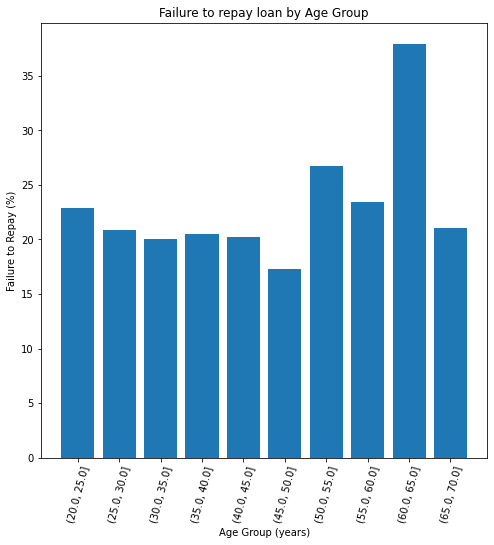

In [24]:
#Failure to repay Graph
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Age Group');

In [25]:
df2['person_income'].describe()

count    2.863200e+04
mean     6.642651e+04
std      5.154746e+04
min      4.000000e+03
25%      3.945600e+04
50%      5.590000e+04
75%      8.000000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [26]:
#Creating Income dataframe
income_data = df2[['loan_status', 'person_income']]
income_data['person_income'] = income_data['person_income']

#Binning income data
income_data['Income_Binning'] = pd.cut(income_data['person_income'], bins = np.linspace(10000, 145000, num = 15))
income_data.head(5)

,loan_status,person_income,Income_Binning
1,0,9600,NaN
2,1,9600,NaN
3,1,65500,"(58214.286, 67857.143]"
4,1,54400,"(48571.429, 58214.286]"
5,1,9900,NaN


In [27]:
income_groups  = income_data.groupby('Income_Binning').mean()
income_groups

,loan_status,person_income
Income_Binning,,
"(10000.0, 19642.857]",0.802797,15991.359441
"(19642.857, 29285.714]",0.342177,25010.779048
"(29285.714, 38928.571]",0.343554,33756.385524
"(38928.571, 48571.429]",0.221645,43532.795841
"(48571.429, 58214.286]",0.201186,53052.171009
"(58214.286, 67857.143]",0.168463,62448.120111
"(67857.143, 77500.0]",0.155580,72344.494087
"(77500.0, 87142.857]",0.121447,81986.608786
"(87142.857, 96785.714]",0.094214,91995.582344


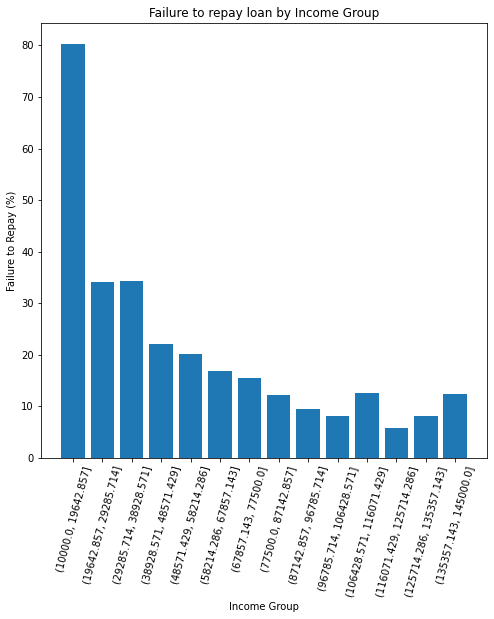

In [28]:
#Failure to repay Graph
plt.figure(figsize = (8, 8))
plt.bar(income_groups.index.astype(str), 100 * income_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Income Group');

In [29]:
df2['person_emp_length'].describe()

count    28632.000000
mean         4.780316
std          4.035616
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

In [30]:
#Creating employment length dataframe
employment_data = df2[['loan_status', 'person_emp_length']]
employment_data['person_emp_length'] = employment_data['person_emp_length']

#Binning employment data
employment_data['EMPLEN_BINNED'] = pd.cut(employment_data['person_emp_length'], bins = np.linspace(0, 45, num = 10))
employment_data.head(5)

,loan_status,person_emp_length,EMPLEN_BINNED
1,0,5.0,"(0.0, 5.0]"
2,1,1.0,"(0.0, 5.0]"
3,1,4.0,"(0.0, 5.0]"
4,1,8.0,"(5.0, 10.0]"
5,1,2.0,"(0.0, 5.0]"


In [31]:
employment_groups = employment_data.groupby('EMPLEN_BINNED').mean()
employment_groups

,loan_status,person_emp_length
EMPLEN_BINNED,,
"(0.0, 5.0]",0.228164,2.947897
"(5.0, 10.0]",0.182029,7.449529
"(10.0, 15.0]",0.162019,12.465385
"(15.0, 20.0]",0.150000,17.378261
"(20.0, 25.0]",0.246753,22.220779
"(25.0, 30.0]",0.214286,27.428571
"(30.0, 35.0]",0.200000,31.600000
"(35.0, 40.0]",0.000000,38.000000
"(40.0, 45.0]",0.000000,41.000000


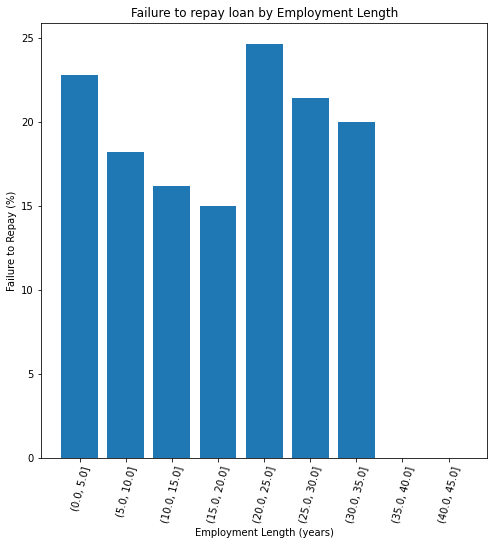

In [32]:
#Failure to repay graph
plt.figure(figsize = (8, 8))
plt.bar(employment_groups.index.astype(str), 100 * employment_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Employment Length (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Employment Length');

In [33]:
df2['loan_amnt'].describe()

count    28632.000000
mean      9655.331447
std       6327.798706
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [34]:
#Creating dataframe for loan amount
loanamnt_data = df2[['loan_status', 'loan_amnt']]
loanamnt_data['loan_amnt'] = loanamnt_data['loan_amnt']

#Bining loan amount
loanamnt_data['LOANAMNT_BINNED'] = pd.cut(loanamnt_data['loan_amnt'], bins = np.linspace(0, 35000, num = 8))
loanamnt_data.head(5)

,loan_status,loan_amnt,LOANAMNT_BINNED
1,0,1000,"(0.0, 5000.0]"
2,1,5500,"(5000.0, 10000.0]"
3,1,35000,"(30000.0, 35000.0]"
4,1,35000,"(30000.0, 35000.0]"
5,1,2500,"(0.0, 5000.0]"


In [35]:
loanamnt_groups = loanamnt_data.groupby('LOANAMNT_BINNED').mean()
loanamnt_groups

,loan_status,loan_amnt
LOANAMNT_BINNED,,
"(0.0, 5000.0]",0.198240,3481.725128
"(5000.0, 10000.0]",0.178245,7862.908851
"(10000.0, 15000.0]",0.230203,12986.680479
"(15000.0, 20000.0]",0.306736,18171.822374
"(20000.0, 25000.0]",0.356863,23849.542484
"(25000.0, 30000.0]",0.311558,28738.316583
"(30000.0, 35000.0]",0.351064,34571.542553


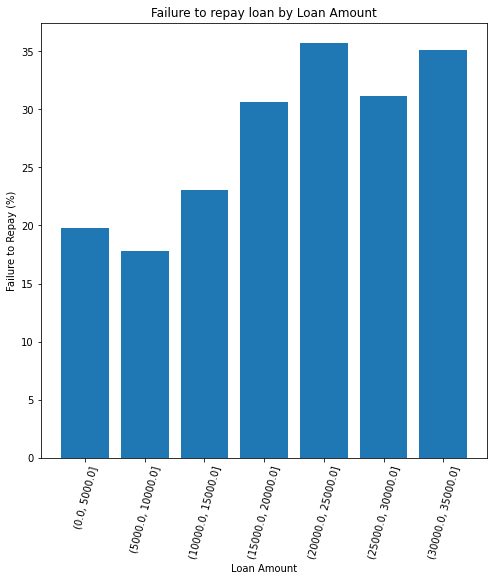

In [36]:
#Failure to repay graph
plt.figure(figsize = (8, 8))
plt.bar(loanamnt_groups.index.astype(str), 100 * loanamnt_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Loan Amount'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Loan Amount');

lower income groups and groups who have higher loan amounts default more as evident from above graphs. They also have a strong correlation of 0.32. Hence the loan to income ratio will be closer to 1 (default). We will see this next.


In [37]:
df2['loan_percent_income'].describe()

count    28632.000000
mean         0.169489
std          0.106361
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [38]:
#Creating loan to income dataframe
loanincomeratio_data = df2[['loan_status', 'loan_percent_income']]
loanincomeratio_data['loan_percent_income'] = loanincomeratio_data['loan_percent_income']

#Binning loan amount data
loanincomeratio_data['LOANINCOME_BINNED'] = pd.cut(loanincomeratio_data['loan_percent_income'], bins = np.linspace(0, 1, num = 21))
loanincomeratio_data.head(5)

,loan_status,loan_percent_income,LOANINCOME_BINNED
1,0,0.10,"(0.05, 0.1]"
2,1,0.57,"(0.55, 0.6]"
3,1,0.53,"(0.5, 0.55]"
4,1,0.55,"(0.5, 0.55]"
5,1,0.25,"(0.2, 0.25]"


In [39]:
loanincome_groups = loanincomeratio_data.groupby('LOANINCOME_BINNED').mean()
loanincome_groups

,loan_status,loan_percent_income
LOANINCOME_BINNED,,
"(0.0, 0.05]",0.102758,0.037974
"(0.05, 0.1]",0.126087,0.080689
"(0.1, 0.15]",0.128538,0.129582
"(0.15, 0.2]",0.173885,0.179597
"(0.2, 0.25]",0.192877,0.229088
"(0.25, 0.3]",0.255759,0.279483
"(0.3, 0.35]",0.688467,0.327989
"(0.35, 0.4]",0.693723,0.378690
"(0.4, 0.45]",0.745726,0.427500


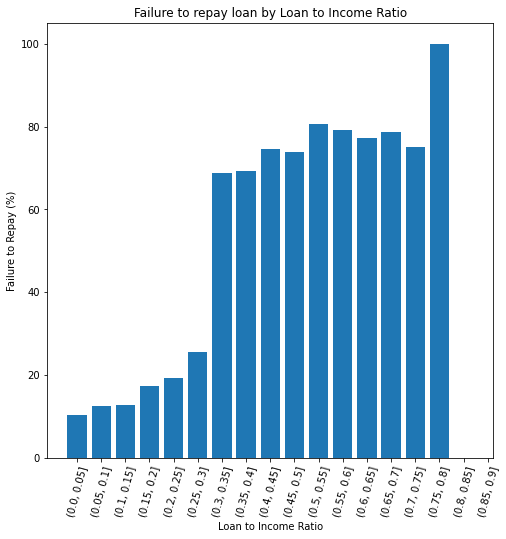

In [40]:
#Failure to repay graph
plt.figure(figsize = (8, 8))
plt.bar(loanincome_groups.index.astype(str), 100 * loanincome_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Loan to Income Ratio'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Loan to Income Ratio');

In [41]:
df2['loan_int_rate'].describe()

count    28632.000000
mean        11.039701
std          3.229409
min          5.420000
25%          7.900000
50%         10.990000
75%         13.480000
max         23.220000
Name: loan_int_rate, dtype: float64

In [42]:
#Creating interest rate dataframe
loanint_data = df2[['loan_status', 'loan_int_rate']]
loanint_data['loan_int_rate'] = loanint_data['loan_int_rate']

#Binning rate data
loanint_data['LOANINT_BINNED'] = pd.cut(loanint_data['loan_int_rate'], bins = np.linspace(0, 25, num = 26))
loanint_data.head(5)

,loan_status,loan_int_rate,LOANINT_BINNED
1,0,11.14,"(11.0, 12.0]"
2,1,12.87,"(12.0, 13.0]"
3,1,15.23,"(15.0, 16.0]"
4,1,14.27,"(14.0, 15.0]"
5,1,7.14,"(7.0, 8.0]"


In [43]:
loanint_groups = loanint_data.groupby('LOANINT_BINNED').mean()
loanint_groups

,loan_status,loan_int_rate
LOANINT_BINNED,,
"(0.0, 1.0]",NaN,NaN
"(1.0, 2.0]",NaN,NaN
"(2.0, 3.0]",NaN,NaN
"(3.0, 4.0]",NaN,NaN
"(4.0, 5.0]",NaN,NaN
"(5.0, 6.0]",0.055292,5.687433
"(6.0, 7.0]",0.082817,6.578384
"(7.0, 8.0]",0.102639,7.607402
"(8.0, 9.0]",0.133958,8.710837


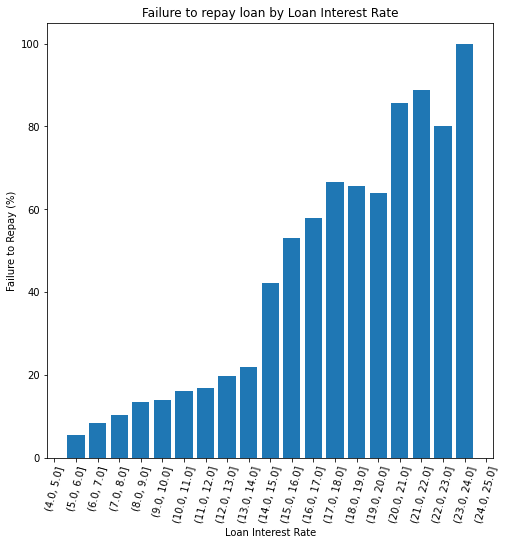

In [44]:
#Failure to repay graph
plt.figure(figsize = (8, 8))
plt.bar(loanint_groups.index.astype(str), 100 * loanint_groups['loan_status'])
plt.xticks(rotation = 75); plt.xlabel('Loan Interest Rate'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to repay loan by Loan Interest Rate');

In [45]:
#Analysis of categorical columns
fig = px.parallel_categories(df2, 
                             color_continuous_scale=px.colors.diverging.Tealrose, 
                             color="loan_status",
                             dimensions=['person_home_ownership', 'loan_intent', "loan_grade", 'cb_person_default_on_file'], 
                             labels={col:col.replace('_', ' ') for col in df2.columns})
fig.show()

Borrowers who tend to rent default on their loans more than borrowers who have a mortgage or who outright own their home. Majority of the default for home owners with a mortgage is due to medical loans and for renters, majority default on loans for debt consolidation followed by medical loans.

Debt consolidation and medical loans are defaulted on the most with venture loans defaulting the least. Most loans were taken out for education and least for home improvement.

Loan grades A, B and C are the most common followed by D, E F and G. Loan D had the most amount of defaults, where most of these defaulters have a previous default on their file. 

Most of the defaults with borrowers with no previous default come from loan grade B.

Most of the borrowers are those who have not defaulted on their loans before and they also have a higher default than those with a previous default on their file.

###Target variable

In [50]:
df2['loan_status'].describe()

count    28632.000000
mean         0.216611
std          0.411942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [51]:
df.loan_status.value_counts() / len(df) * 100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

In [52]:
df2.loan_status.value_counts() / len(df) * 100

0    68.843805
1    19.035634
Name: loan_status, dtype: float64

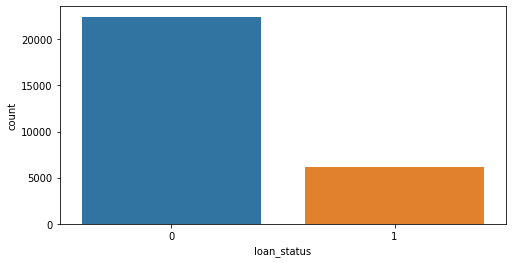

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status', data=df2)
plt.show()

The target variable is imbalanced. This is addressed in the modelling stage later with a function called 'Stratify'

###Predicting loan status

In [54]:
cat_cols = pd.DataFrame(df2[df2.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [105]:
#One-hot encoding categorical columns
encoded_cat_cols = pd.get_dummies(cat_cols)

In [56]:
# Numerical columns
cleaned_num_cols = pd.DataFrame(df2[df2.select_dtypes(include=['float', 'int']).columns])

In [57]:
cleaned_num_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
5,21,9900,2.0,2500,7.14,1,0.25,2
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [58]:
# concat the numerical and one-hot encoded categorical variebles
df2 = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [59]:
# checking cleaned dataset size 
print ('The cleaned dataset has {} rows and {} columns'.format(df2.shape[0], 
                                                               df2.shape[1]))

The cleaned dataset has 28632 rows and 27 columns


In [71]:
#Library imports
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [79]:
#Splitting data into train and test
label = df2['loan_status']
features = df2.drop('loan_status',axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, label, 
                                                                    random_state=42, stratify=label, test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(x_train.shape[0], x_test.shape[0]))

The train dataset has 20042 data
The test dataset has 8590 data


In [80]:
# Check target distribution in the train dataset
print('Target distribution in the train dataset:')
print(y_train.value_counts(normalize=True))

# Check target distribution in the test dataset
print('Target distribution in the test dataset:')
print(y_test.value_counts(normalize=True))

Target distribution in the train dataset:
0    0.783405
1    0.216595
Name: loan_status, dtype: float64
Target distribution in the test dataset:
0    0.783353
1    0.216647
Name: loan_status, dtype: float64


This indicates that in both the training and testing datasets, roughly 78% of the loans did not default while the remaining 22% did. The target variable (loan_status) distributions in both the training and testing sets are alike, demonstrating the successful implementation of stratification.

In [106]:
#'print('Distribution target class before balancing: ', Counter(y_train))

Distribution target class before balancing:  Counter({0: 15701, 1: 4341})


In [107]:
#balanced= SMOTE(sampling_strategy=1, random_state=42, k_neighbors=3)
#x_train_balanced, y_train_balanced = balanced.fit_resample(x_train, y_train)
#print('Distribution target class after balancing: ', Counter(y_train_balanced))

Distribution target class after balancing:  Counter({0: 15701, 1: 15701})


In [83]:
#Defining model assess function to test >1 model
def model_assess(model, name='Default'):
 
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds_proba = model.predict_proba(x_test)
    print(name, '\n',classification_report(y_test, model.predict(x_test)))
   
    #Create a confusion matrix
    conf_m = confusion_matrix(y_test, preds)

    #Create heatmap for confusion matrix
    class_names=[False, True]
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="Blues", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label') 
    plt.ylabel('Actual label')
    tick_marks = [0.5, 1.5]
    plt.xticks(tick_marks, class_names) 
    plt.yticks(tick_marks, class_names)
    plt.show()

In [84]:
xgb = XGBClassifier(colsample_bytree=0.9,
                    gamma=0.3,
                    learning_rate=0.01,
                    max_depth=2,
                    n_estimators=90,
                    subsample=0.75)

In [85]:
#XGBoost GridSearchCV hyperparameter tuning
params = {
    "colsample_bytree": [0.9, 0.91],
    "gamma": [0.3, 0.5],
    "learning_rate": [0.01, 0.001, 0.2], # default 0.1 
    "max_depth": [2, 5], # default 3
    "n_estimators": [90, 110], # default 100
    "subsample": [0.75, 0.8, 0.85]
}

Grid_CV = GridSearchCV(xgb, param_grid=params, cv=3, verbose=1, n_jobs=16, return_train_score=True)
Grid_CV.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.9, gamma=0.3,
                                     learning_rate=0.01, max_depth=2,
                                     n_estimators=90, subsample=0.75),
             n_jobs=16,
             param_grid={'colsample_bytree': [0.9, 0.91], 'gamma': [0.3, 0.5],
                         'learning_rate': [0.01, 0.001, 0.2],
                         'max_depth': [2, 5], 'n_estimators': [90, 110],
                         'subsample': [0.75, 0.8, 0.85]},
             return_train_score=True, verbose=1)

In [86]:
print("Best parameters: ", Grid_CV.best_params_)
print("Best CV Score: ", Grid_CV.best_score_)

Best parameters:  {'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 90, 'subsample': 0.75}
Best CV Score:  0.9336891252669037


In [87]:
#Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 100, 128, 200, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

#Gridsearch
Ranforestgrid = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Ranforestgrid, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train, y_train)

print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.81503781 0.80271407 0.80186591 0.80146685 0.80151692 0.92765178
 0.92750202 0.9282007  0.92830036 0.92770168 0.93094488 0.93129413
 0.93154359 0.93114445 0.93159351], using {'max_depth': 16, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.502289,0.011215,0.035052,0.003873,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.814168,0.828137,0.798653,0.827844,0.806387,0.815038,0.011659,11
1,0.544421,0.111117,0.033633,0.001421,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.802943,0.807184,0.801397,0.802894,0.799152,0.802714,0.002626,12
2,0.607247,0.007225,0.040350,0.001192,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.803442,0.803692,0.801397,0.801647,0.799152,0.801866,0.001640,13
3,0.982205,0.083542,0.073634,0.006984,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.802195,0.802195,0.802894,0.800898,0.799152,0.801467,0.001325,15
4,1.575497,0.281590,0.099333,0.019972,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.800698,0.800200,0.800399,0.801397,0.804890,0.801517,0.001735,14
5,0.702913,0.024664,0.037273,0.003631,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.930407,0.927912,0.928393,0.923902,0.927645,0.927652,0.002110,9
6,1.342698,0.239209,0.071645,0.012861,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.930656,0.928910,0.926896,0.924152,0.926896,0.927502,0.002186,10
7,1.508483,0.186681,0.069129,0.002392,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.930656,0.927413,0.928643,0.924900,0.929391,0.928201,0.001957,7
8,2.955203,1.104031,0.114642,0.014093,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.931404,0.929409,0.928393,0.923653,0.928643,0.928300,0.002553,6
9,3.326306,0.520569,0.160333,0.031181,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.930905,0.927413,0.928144,0.924401,0.927645,0.927702,0.002071,8


In [89]:
print("Best parameters: ", grid_results.best_params_)
print("Best CV Score: ", grid_results.best_score_)

Best parameters:  {'max_depth': 16, 'n_estimators': 256}
Best CV Score:  0.9315935104099609


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    6.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks   

RandomForest Classifier 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6729
           1       0.97      0.72      0.82      1861

    accuracy                           0.93      8590
   macro avg       0.95      0.85      0.89      8590
weighted avg       0.94      0.93      0.93      8590



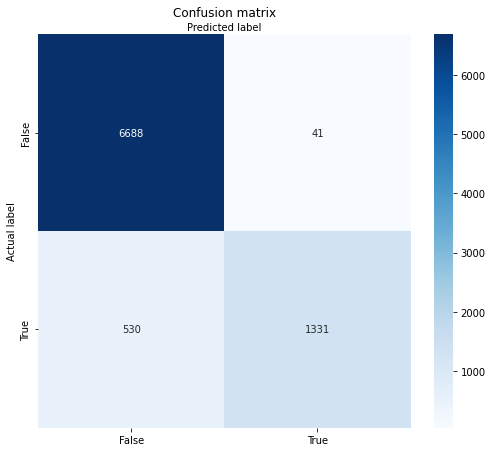

XGBoost 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6729
           1       0.96      0.73      0.83      1861

    accuracy                           0.93      8590
   macro avg       0.94      0.86      0.89      8590
weighted avg       0.94      0.93      0.93      8590



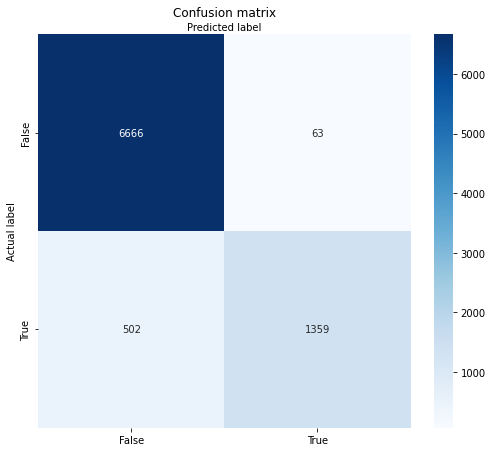

In [90]:
#Random Forest using best parameters
random_forest = RandomForestClassifier(n_estimators = 256, max_depth=16, random_state = 50, verbose = 1, n_jobs = -1)
model_assess(random_forest, 'RandomForest Classifier')
#XGBoost using best parameters
xgb = XGBClassifier(n_estimators=90, subsample=0.75, colsample_bytree=0.9, max_depth=5, gamma=0.3, learning_rate=0.2, objective='binary:logistic', random_state=42)
model_assess(xgb, 'XGBoost')

This code is displaying the results of evaluating two machine learning models, Random Forest Classifier and XGBoost, on a binary classification task. The evaluation metrics reported include precision, recall, f1-score, and support. Precision is the ratio of true positive predictions to all positive predictions, recall is the ratio of true positive predictions to all actual positive cases, and f1-score is the harmonic mean of precision and recall. The results show that the Random Forest Classifier has a the same accuracy of 0.93 compared to XGBoost. Both models perform well in terms of precision, but Random Forest Classifier has a higher precision of 0.97 compared to XGBoost's 0.98. In terms of f1-score, XGBoost performs better with a score of 0.82 compared to Random Forest Classifier's 0.83. Recall was also slightly better for XGBoost.

In binary classification problems like this, relying solely on accuracy can be deceptive as it only evaluates the total number of correctly predicted outcomes and doesn't differentiate between true positive and true negative predictions. A more in-depth evaluation can be achieved through precision, recall, and F1 score. These metrics give a clearer picture of how well the model is capable of making positive predictions, in this case, predictions of loan default. Of these metrics, recall is particularly significant as it gauges the model's ability to identify all actual positive cases, which in this scenario refers to all loans that will default. A high recall value indicates that the model is less prone to overlooking any actual default loans, making it a critical factor in this context.

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed:    0.7s finished


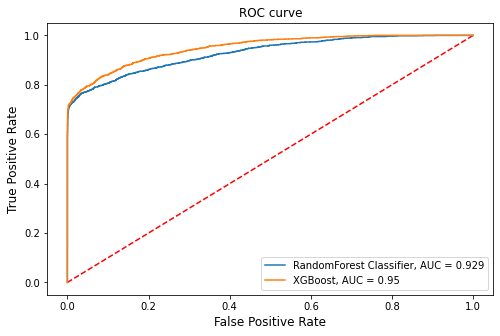

In [91]:
#ROC AUC
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

#DecisionTree Classifier
preds_proba_D_tree = random_forest.predict_proba(x_test)
probsD_tree = preds_proba_D_tree[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsD_tree)
auclg = roc_auc_score(y_test, probsD_tree)
plt.plot(fpr, tpr, label=f'RandomForest Classifier, AUC = {str(round(auclg,3))}')

#XGBoost
preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

The higher the value of AUC, the better the model is in predicting its classes accurately. Here the XGBoost has a higher AUC value than RandomForest suggesting a superior performance


We investigate below the features which contributed the most in predicting the loan_status target variable.

Text(0.5, 1.0, 'Feature Significance for XGBoost')

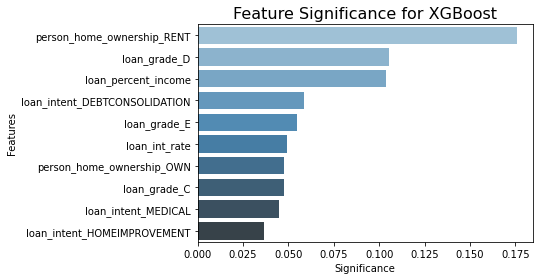

In [101]:
feature_importance = pd.DataFrame({'Features': x_train.columns, 
                                   'Significance': xgb.feature_importances_})

new_features_df = feature_importance[feature_importance['Significance']>0
                                    ].sort_values(by=['Significance'],ascending=False)

ax=sns.barplot(y=new_features_df[:10]['Features'],
              x=new_features_df[:10]['Significance'],
              palette='Blues_d', orient='h')
ax.set_title("Feature Significance for XGBoost")

Text(0.5, 1.0, 'Feature Significance for Random Forest')

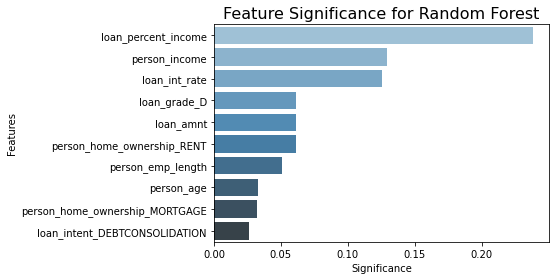

In [103]:
feature_importance = pd.DataFrame({'Features': x_train.columns, 
                                   'Significance': random_forest.feature_importances_})

new_features_df = feature_importance[feature_importance['Significance']>0
                                    ].sort_values(by=['Significance'],ascending=False)

ax=sns.barplot(y=new_features_df[:10]['Features'],
              x=new_features_df[:10]['Significance'],
              palette='Blues_d', orient='h')
ax.set_title("Feature Significance for Random Forest")